# Урок 4. Визуальный анализ данных

## Условие 1: Задача 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Скачать данные в закрепе к уроку

In [3]:
df = pd.read_csv('./kc_house_data.csv', sep = ',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1.2 Изучите стоимости недвижимости

In [4]:
df['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

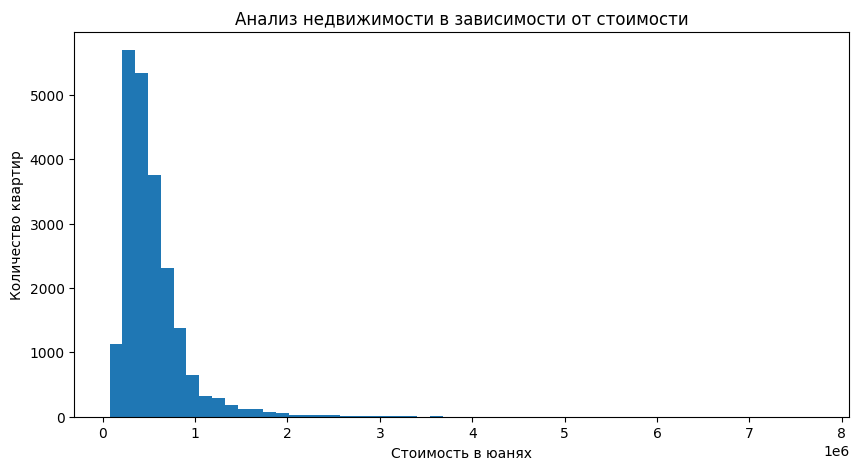

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins = 55)
plt.title('Анализ недвижимости в зависимости от стоимости')
plt.xlabel('Стоимость в юанях')
plt.ylabel('Количество квартир'); # точка с запятой чтобы не было Text

### 1.3 Изучите распределение квадратуры жилой

In [6]:
df['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

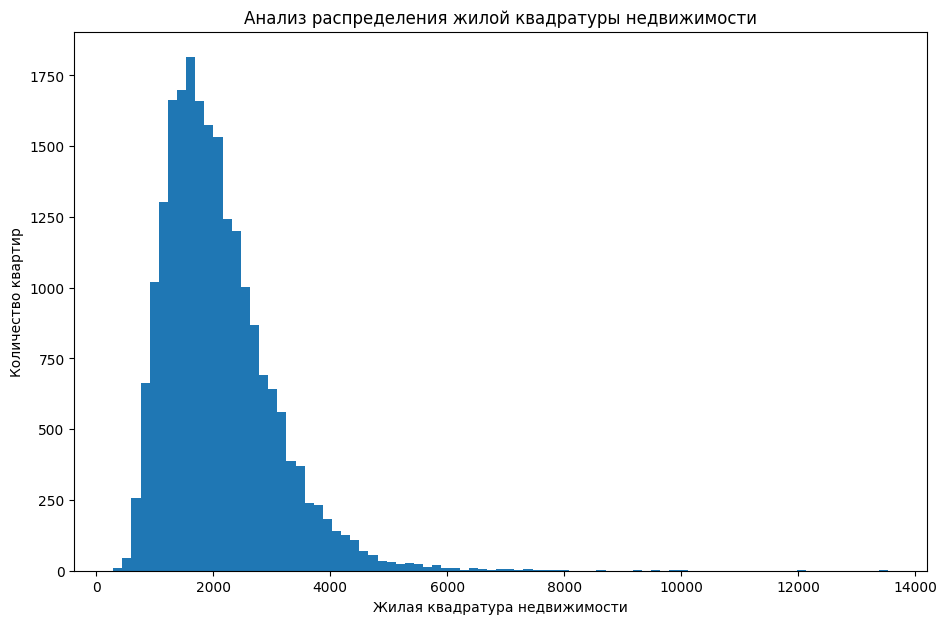

In [7]:
plt.figure(figsize=(11, 7))
plt.hist(df['sqft_living'], bins = 85)
plt.title('Анализ распределения жилой квадратуры недвижимости')
plt.xlabel('Жилая квадратура недвижимости')
plt.ylabel('Количество квартир'); # точка с запятой чтобы не было Text

### 1.4 Изучите распределение года постройки

In [8]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

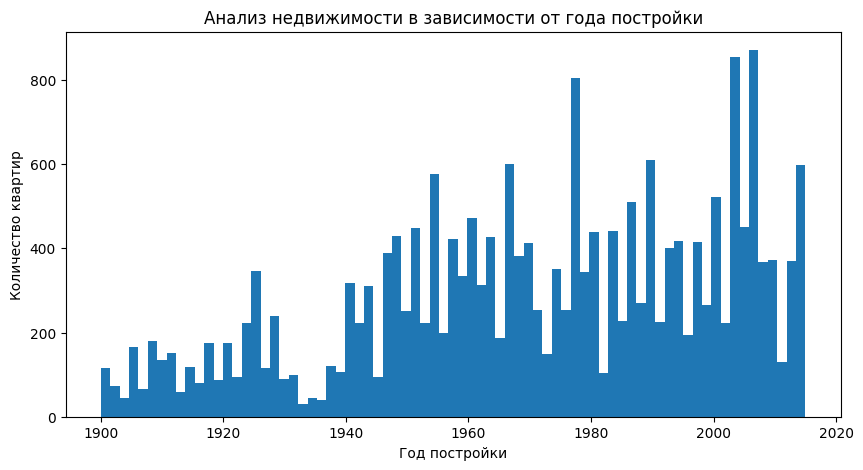

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df['yr_built'], bins = 75)
plt.title('Анализ недвижимости в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество квартир'); # точка с запятой чтобы не было Text

## Условие 2: Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы.

In [10]:
# df['waterfront'].value_counts() # один вариант подготовки данных
data1 = df.groupby('waterfront').count()['id']
data1.name = 'waterfront'
data1

waterfront
0    21450
1      163
Name: waterfront, dtype: int64

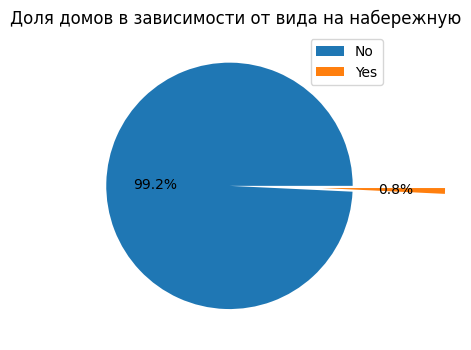

In [11]:
# data.plot.pie(y='waterfront'); # точка с запятой - чтобы не было <AxesSubplot: ylabel='waterfront'>
plt.figure(figsize=(6, 4))
explode = [0.05, 0.7]
plt.pie(data1, autopct='%1.1f%%', explode=explode)
plt.title('Доля домов в зависимости от вида на набережную')
plt.legend(['No', 'Yes']);

#### Вывод: Менее одного процента домов имеют вид на набережную - это дорогие элитные квартиры. Значительная часть домов имеет другой вид из окна: обычно на дорогу и во двор.

### 2.2 Изучите распределение этажей домов

In [12]:
# df['floors'].value_counts()
data2 = df.groupby('floors').count()['id']
data2.name = 'floors'
data2

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

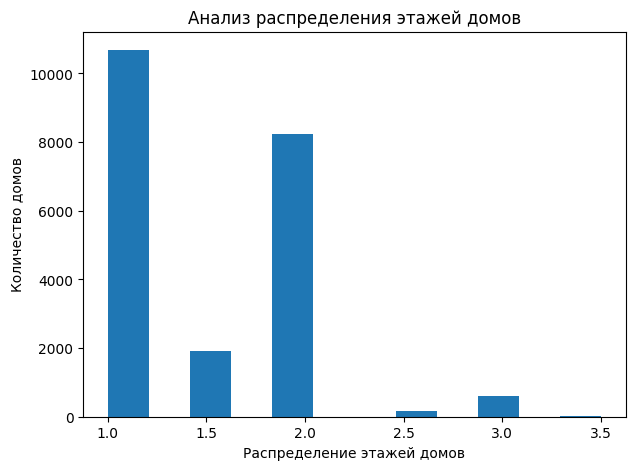

In [13]:
plt.figure(figsize=(7, 5))
plt.hist(df['floors'], bins=12)
plt.title('Анализ распределения этажей домов')
plt.xlabel('Распределение этажей домов')
plt.ylabel('Количество домов');

### 2.2 Изучите распределение состояния домов

In [14]:
# готовим данные для графика
data3 = df.groupby('condition').count()['id']
data3.name = 'Состояние домов'
data3

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: Состояние домов, dtype: int64

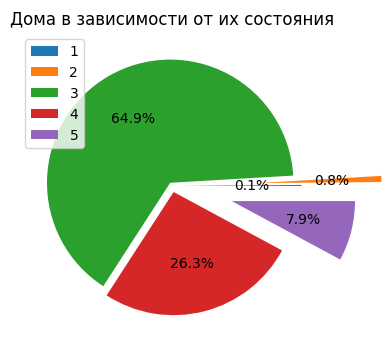

In [15]:
plt.figure(figsize=(6, 4))
explode = [0.05, 0.7, 0.03, 0.05, 0.5]
plt.pie(data3, autopct='%1.1f%%', explode=explode)
plt.title('Дома в зависимости от их состояния')
plt.legend(['1', '2', '3', '4', '5'], loc='upper left');

## Условие 3: Задача 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

##### https://gb.ru/lessons/318312 - анализ зависимостей с 29 минуты

In [16]:
corr_matrix = df.corr(numeric_only = True) # применяется только к числовым столбцам
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


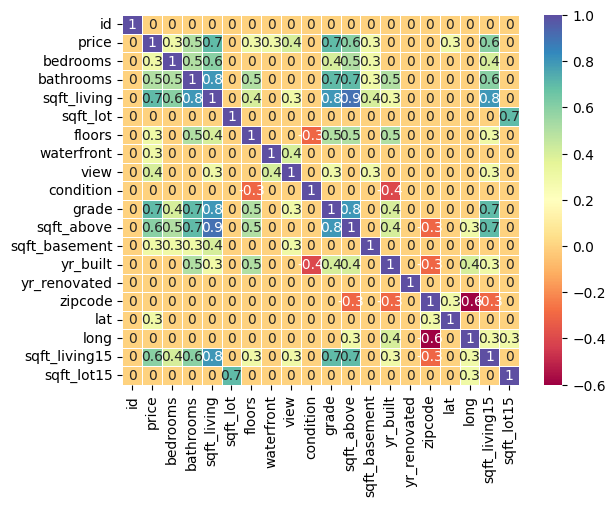

In [17]:
# тепловая карта
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Spectral');
# annot=True помогает отобразить коэффициент корреляции
# cmap - чтобы изменить цвета, используемые в тепловой карте

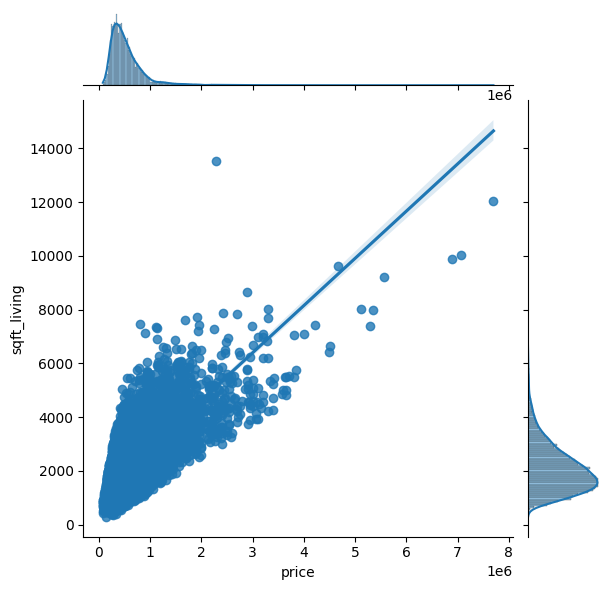

In [18]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

### Жилая площадь прямо пропорционально влияет на цену.

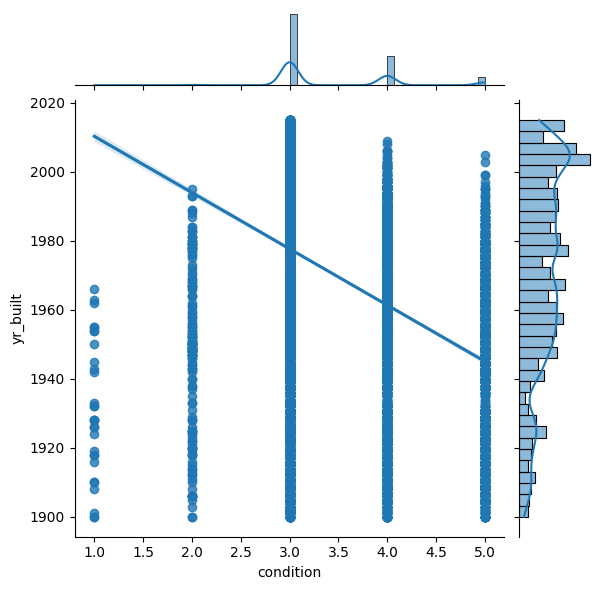

In [19]:
# обратная корреляция без цены
sns.jointplot(x=df['condition'], y=df['yr_built'], kind='reg');

### Обратная корреляция между состоянием и годом постройки говорит об их противоположной связи: чем новее дом, тем хуже его состояние. Вероятно, потому что строящиеся дома пока находятся на уровне котлована или не имеют отделки. Или это просто ложная связь. Что означают вертикальные линии - затрудняюсь оценить.

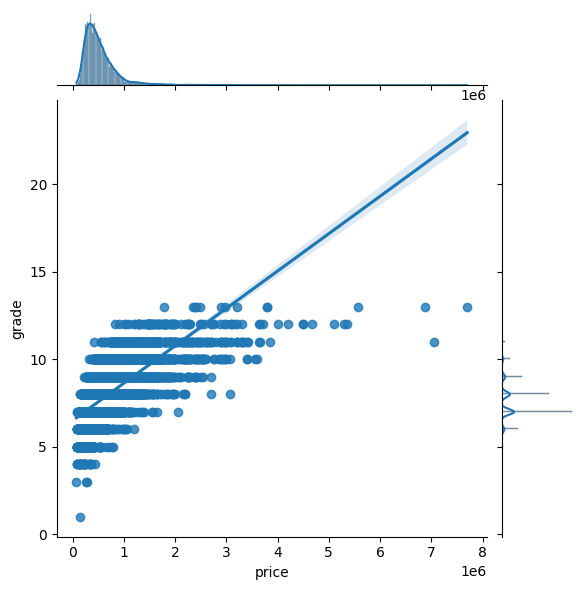

In [20]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

### Связь прямая. Классы жилья основаны на инженерных, технических, архитектурных характеристиках жилого комплекса, которые напрямую влияют на цену квадратного метра. Классы нужны, чтобы покупатель сразу представлял себе, сколько стоит квартира в «комфорте» или «клубном доме».
### (взято с сайта https://m2.ru/media/article/about-classes/).

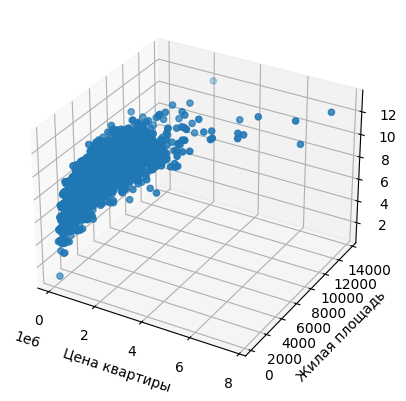

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['price']
y = df['sqft_living']
z = df['grade']

ax.set_xlabel("Цена квартиры")
ax.set_ylabel("Жилая площадь")
ax.set_zlabel("Класс дома")

ax.scatter(x, y, z)

plt.show()

### Жилплощадь и класс дома вместе напрямую влияют на цену.

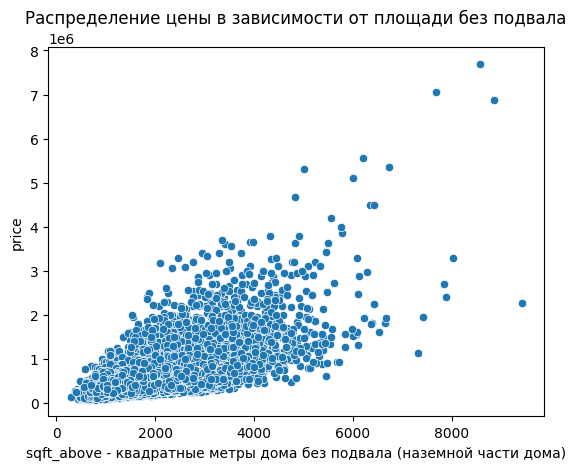

In [22]:
sns.scatterplot(y=df['price'], x=df['sqft_above'])

plt.xlabel('Цена дома')
plt.xlabel('sqft_above - квадратные метры дома без подвала (наземной части дома)')
plt.title('Распределение цены в зависимости от площади без подвала');

### Изначально было sns.boxplot(y=df['price'], x=df['sqft_above'], whis=1.5) - это неправильно!

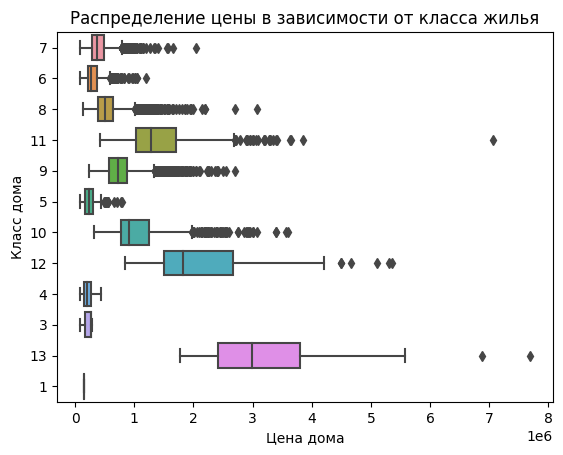

In [23]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('Цена дома')
plt.ylabel('Класс дома')
plt.title('Распределение цены в зависимости от класса жилья');

### Самые дорогие дома наивысшего класса 13.

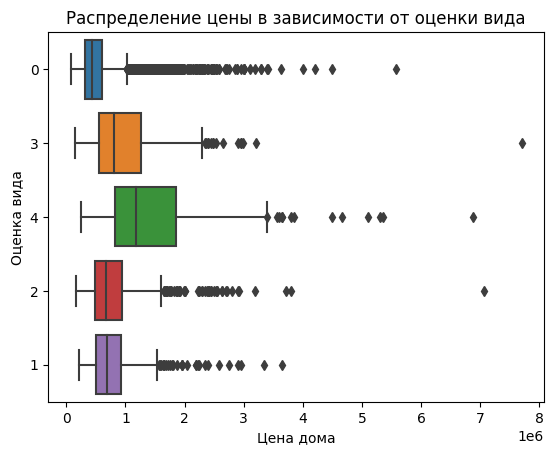

In [24]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('Цена дома')
plt.ylabel('Оценка вида')
plt.title('Распределение цены в зависимости от оценки вида');

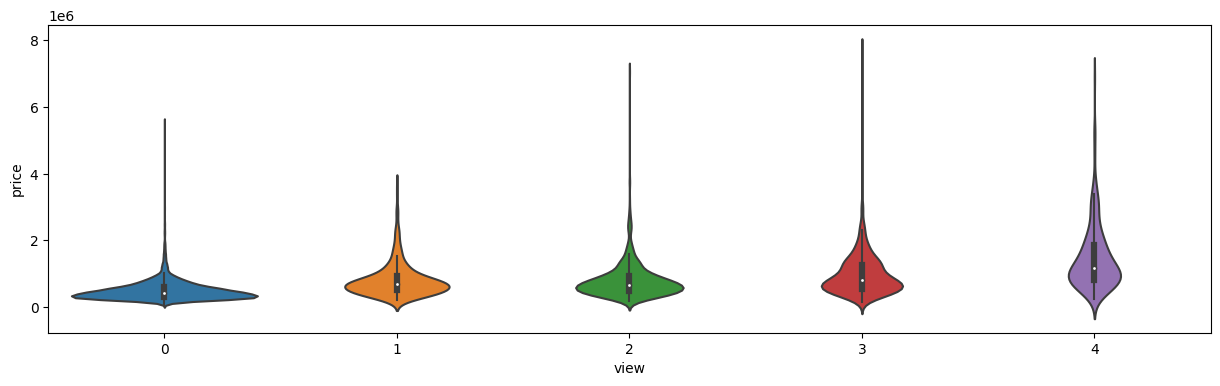

In [25]:
plt.figure(figsize=(15, 4))
sns.violinplot(y=df['price'], x=df['view']);

### Оценка вида напрамую влияет на стоимость дома. Чем лучше вид, тем дороже дом.

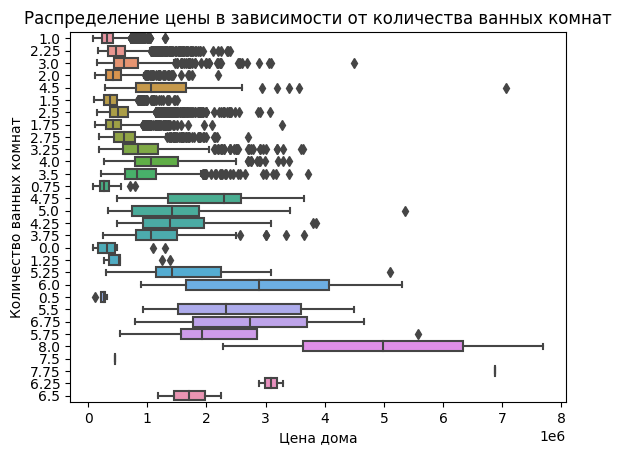

In [26]:
sns.boxplot(x=df['price'], y=df['bathrooms'].astype('str'), whis=1.5);
plt.xlabel('Цена дома')
plt.ylabel('Количество ванных комнат')
plt.title('Распределение цены в зависимости от количества ванных комнат');

### Самые дорогие дома с количеством ванных комнат 8 и золотым унитазом:).

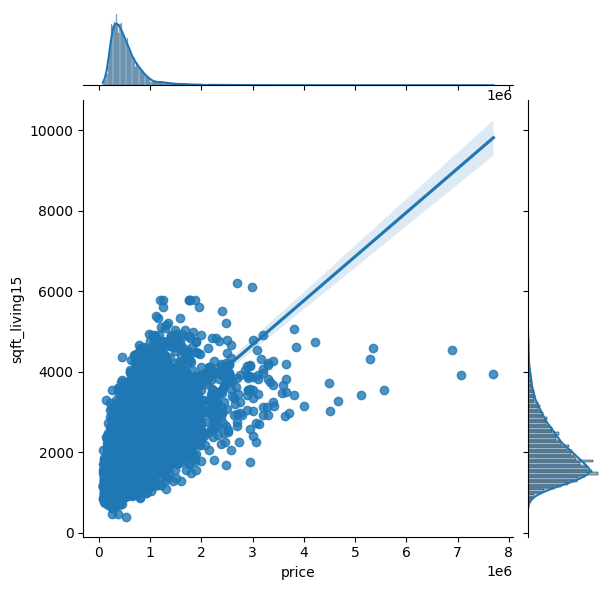

In [27]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg');

### sqft_living15 - это квадратные метры жилой площади у 15 ближайших соседей. Этот показатель прямо пропорционально влияет на цену квартиры.